# *Title*

Plan:
 Data Preprocessing
    *import data
    *check for / handle missing data
    3) handle outliers, duplicates and inaccuracies
    4) encode catagorical variables
    5)feature selection
    6) feature engineering 
    7) feature scaling
    8) data Augmentation
2)Model Development
    6) model selection
        1) linear regression models, support vector regression (SVR)
        2) support vector regression (SVR)
        3) decision tree-based models
            a)  Random Forest
            b) XGBoost)
        4) neural networks
    7) split data
    8) train initial models
    9) hyperparameter tuning
    10) evaluate tuned models
        1) MAPE
        2) R^2
        3) RMSE
        4) MAE


# Imports*
## *packages*
## *data*
# *Data Analysis*
## *Visualisation*
## *observations*
# *Data Preprocessing*



In [418]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns


# **Data Preprocessing**



## *Import Data*

In [419]:

train_dir = "https://raw.githubusercontent.com/harvey-py/COMP3010/main/Assignment/Data/train.csv"
test_dir = "https://raw.githubusercontent.com/harvey-py/COMP3010/main/Assignment/Data/test.csv"

# train = pd.read_csv(train_dir)
# test_data = pd.read_csv(test_dir)
raw_train = pd.read_csv('train.csv')
raw_test = pd.read_csv('test.csv')


## *Data Visualisation*

In [420]:
raw_train.columns

Index(['Unnamed: 0', 'Tank Failure Pressure (bar)', 'Liquid Ratio',
       'Tank Width (m)', 'Tank Length (m)', 'Tank Height (m)',
       'BLEVE Height (m)', 'Vapour Height (m)', 'Vapour Temperature (K)',
       'Liquid Temperature (K)', 'Obstacle Distance to BLEVE (m)',
       'Obstacle Width (m)', 'Obstacle Height (m)', 'Obstacle Thickness (m)',
       'Obstacle Angle', 'Status', 'Liquid Critical Pressure (bar)',
       'Liquid Boiling Temperature (K)', 'Liquid Critical Temperature (K)',
       'Sensor ID', 'Sensor Position Side', 'Sensor Position x',
       'Sensor Position y', 'Sensor Position z', 'Target Pressure (bar)'],
      dtype='object')

In [421]:
raw_train

,Unnamed: 0,Tank Failure Pressure (bar),Liquid Ratio,Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),...,Status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar)
0,3203.0,14.26,0.25,1.58,8.61,1.79,1.01,1.40,457.14,423.07,...,Superheated,37.9,-1.0,152.0,18.0,2.0,19.75,5.70,3.1,0.588298
1,3204.0,14.14,0.25,1.59,8.58,1.81,1.00,1.41,457.71,422.82,...,Superheated,37.9,-1.0,152.0,19.0,3.0,20.00,-5.15,-1.5,0.551524
2,3205.0,14.05,0.24,1.62,8.59,1.79,0.98,1.38,456.58,422.37,...,Superheated,37.9,-1.0,152.0,20.0,3.0,20.00,-5.15,0.8,0.550813
3,3206.0,14.17,0.24,1.59,8.60,1.80,0.98,1.40,456.81,423.28,...,Superheated,37.9,-1.0,152.0,21.0,3.0,20.00,-5.15,3.1,0.528906
4,3207.0,14.09,0.24,1.59,8.60,1.80,1.00,1.40,456.93,423.19,...,Superheated,37.9,-1.0,152.0,22.0,4.0,20.00,-4.90,3.4,0.454363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10045,10244.0,17.75,0.28,2.60,7.40,1.02,1.39,0.79,381.89,350.52,...,Superheated,42.5,-42.0,96.7,12.0,2.0,6.25,-0.60,13.0,0.866291
10046,12758.0,17.85,0.27,2.40,2.22,2.02,1.59,1.38,298.69,308.85,...,Subcooled,37.9,-1.0,152.0,15.0,2.0,11.15,2.20,3.5,0.341971
10047,9438.0,12.58,0.67,1.62,1.42,2.81,1.40,0.99,482.23,413.26,...,Superheated,37.9,-1.0,152.0,16.0,2.0,16.75,8.90,-1.7,0.215026
10048,8689.0,27.89,0.26,2.42,2.40,1.40,1.99,1.01,500.18,329.65,...,Subcooled,37.9,-1.0,152.0,23.0,4.0,12.80,4.20,2.6,0.153747


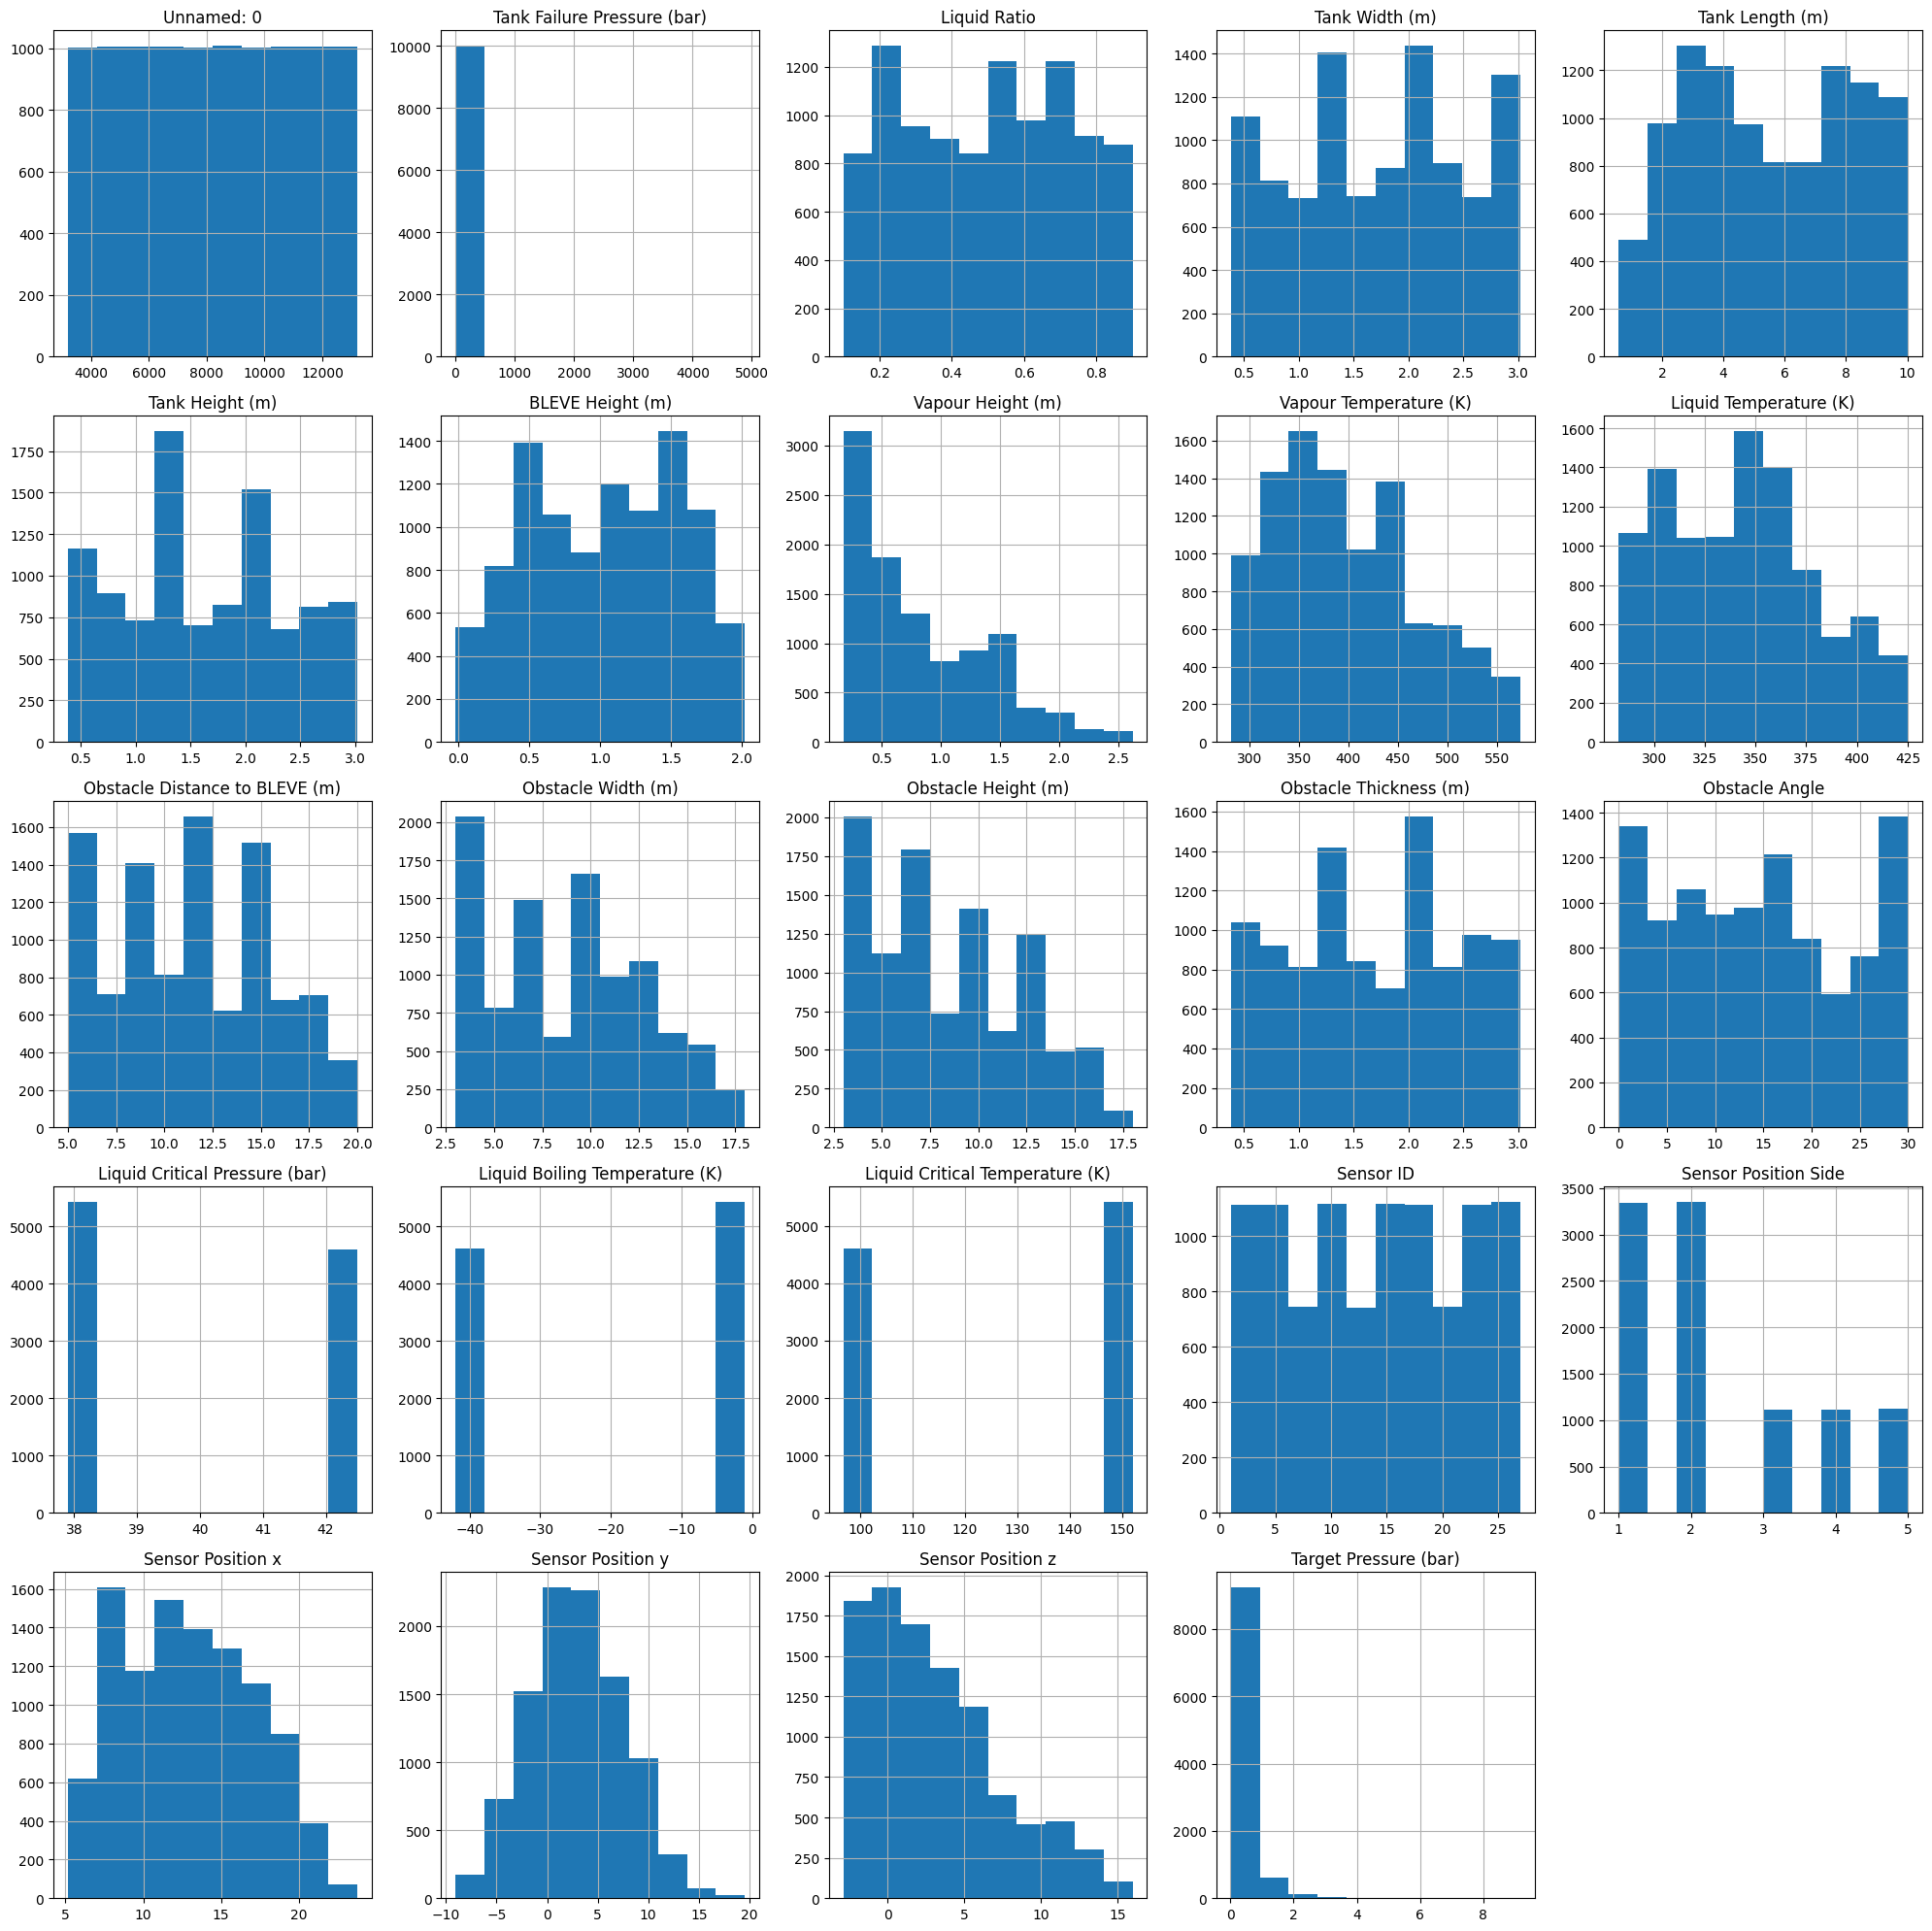

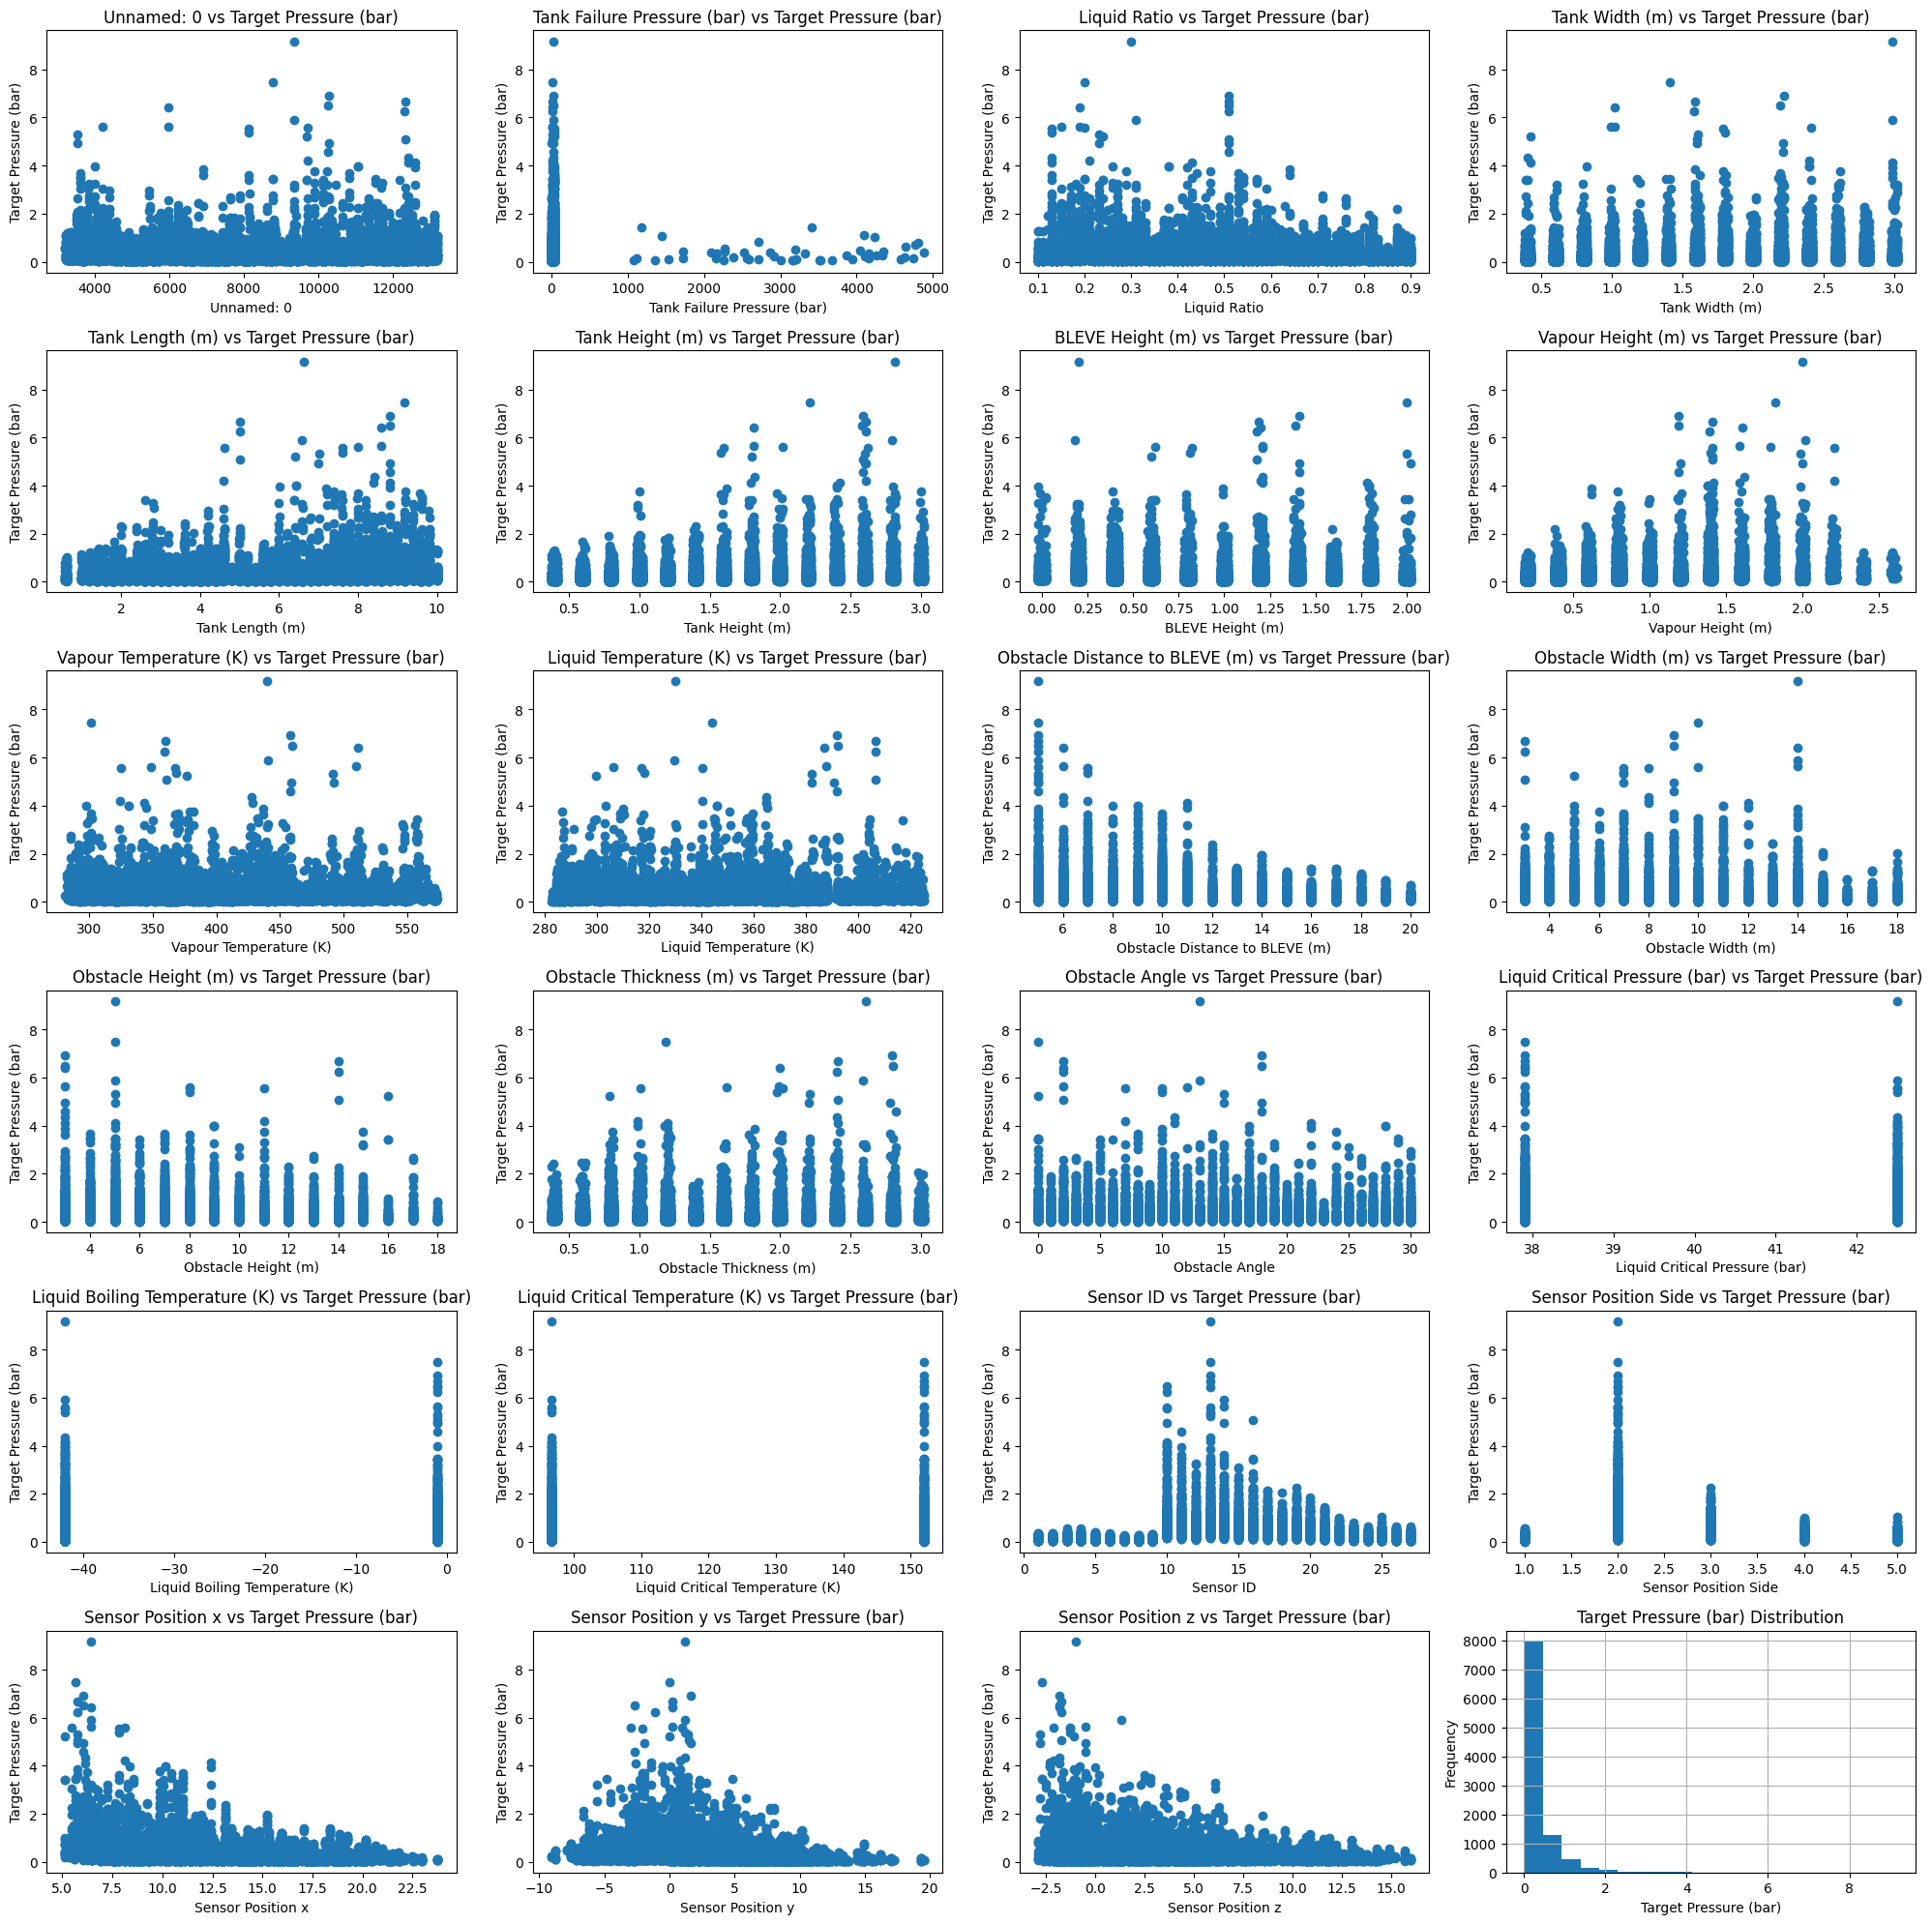

In [422]:
raw_train.hist(figsize = (20,20))
plt.tight_layout()
plt.show()


raw_data_num = raw_train.select_dtypes(include=[np.number])

n_cols = 4
n_rows = 6 # int(len(raw_data_num.columns) / n_cols) + (len(raw_data_num.columns) % n_cols > 0)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 20))
axs = axs.flatten()

i = 0
for col_name in raw_data_num.columns:
    if col_name != "Target Pressure (bar)":
        ax = axs[i]
        i += 1
        ax.scatter(raw_data_num[col_name], raw_data_num["Target Pressure (bar)"])
        ax.set_title(f"{col_name} vs Target Pressure (bar)") 
        ax.set_xlabel(col_name)
        ax.set_ylabel("Target Pressure (bar)")

raw_data_num["Target Pressure (bar)"].hist(ax = axs[i], bins = 20)
axs[i].set_title("Target Pressure (bar) Distribution")
axs[i].set_xlabel("Target Pressure (bar)")
axs[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


observations:
* missing col name
* some tempretaure values in C some in K
* two different values of Liquid boil and critical temp likely correspond to different liquids 
* data appears to be in sets of 27 likely each is a full set of sensor values
* spelling mistakes in 'status' col
* noise in Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m) cols
* -ve sensor position values indicate (0,0,0) is at point of BLEVE
* general data trends to consider:
    - 
    - 
*



## *Missing values*

In [423]:
raw_train.rename(columns = {"Unnamed: 0": "ID"}, inplace = True)
raw_train = raw_train.sort_values('ID').reset_index(drop=True)

In [424]:
 #number of rows before removal
print("Original number of rows:", len(raw_train))

# Show the distribution of NaN counts per row in the original data
nan_counts = raw_train.isnull().sum(axis=1)
print("\nDistribution of NaN counts per row in original data:")
print(nan_counts.value_counts().sort_index())

# Remove rows with more than 1 NaN values
raw_train = raw_train.dropna(thresh=len(raw_train.columns)-1)  # Keep rows with at least n-1 non-NA values

# See how many rows were removed
print("Number of rows after removal:", len(clean_train))
print("Number of rows removed:", len(raw_train) - len(clean_train))



# Show the distribution of NaN counts per row in the original data
nan_counts = clean_train.isnull().sum(axis=1)
print("\nDistribution of NaN counts per row in original data:")
print(nan_counts.value_counts().sort_index())


#convert celcuis to kelven 
raw_train['Liquid Boiling Temperature (K)'] = raw_train['Liquid Boiling Temperature (K)'] + 273
raw_train['Liquid Critical Temperature (K)'] = raw_train['Liquid Critical Temperature (K)'] + 273

raw_train

Original number of rows: 10050

Distribution of NaN counts per row in original data:
0     9940
1      100
20      10
Name: count, dtype: int64
Number of rows after removal: 10040
Number of rows removed: 0

Distribution of NaN counts per row in original data:
0    9940
1     100
Name: count, dtype: int64


,ID,Tank Failure Pressure (bar),Liquid Ratio,Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),...,Status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar)
0,3203.0,14.26,0.25,1.58,8.61,1.79,1.01,1.40,457.14,423.07,...,Superheated,37.9,272.0,425.0,18.0,2.0,19.75,5.70,3.1,0.588298
1,3204.0,14.14,0.25,1.59,8.58,1.81,1.00,1.41,457.71,422.82,...,Superheated,37.9,272.0,425.0,19.0,3.0,20.00,-5.15,-1.5,0.551524
2,3205.0,14.05,0.24,1.62,8.59,1.79,0.98,1.38,456.58,422.37,...,Superheated,37.9,272.0,425.0,20.0,3.0,20.00,-5.15,0.8,0.550813
3,3206.0,14.17,0.24,1.59,8.60,1.80,0.98,1.40,456.81,423.28,...,Superheated,37.9,272.0,425.0,21.0,3.0,20.00,-5.15,3.1,0.528906
4,3207.0,14.09,0.24,1.59,8.60,1.80,1.00,1.40,456.93,423.19,...,Superheated,37.9,272.0,425.0,22.0,4.0,20.00,-4.90,3.4,0.454363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10038,13199.0,27.08,0.22,1.82,3.81,0.60,0.01,0.60,335.57,412.15,...,Superheated,37.9,272.0,425.0,24.0,4.0,8.20,4.50,9.8,0.266413
10039,13200.0,26.99,0.22,1.81,3.80,0.61,0.00,0.61,337.57,412.08,...,Superheated,37.9,272.0,425.0,25.0,5.0,8.20,4.75,-0.1,0.267873
10040,13201.0,27.16,0.21,1.78,3.81,0.62,0.01,0.59,336.08,412.76,...,Superheated,37.9,272.0,425.0,26.0,5.0,8.20,4.75,4.7,0.320323
10041,13201.0,27.16,0.21,1.78,3.81,0.62,0.01,0.59,336.08,412.76,...,Superheated,37.9,272.0,425.0,26.0,5.0,8.20,4.75,4.7,0.320323


In [425]:
def fix_missing_values(raw_train):

    # Remove rows with more than 1 NaN values
    raw_train = raw_train.dropna(thresh=len(raw_train.columns)-1)  # Keep rows with at least n-1 non-NA values

    for index, row in raw_train.iterrows():
        if row.isnull().sum() == 1:
            nan_col = row[row.isnull()].index[0]
            row[nan_col] = raw_train[raw_train['event_ID'] == row['event_ID']][nan_col].median()
    return raw_train
   









## *duplicates*


In [426]:
#Removing Duplicates (self-explanatory)
display(raw_train2[raw_train2.duplicated(keep=False)].sort_values(by=raw_train2.columns.tolist()))
raw_train3 = raw_train2.drop_duplicates()
print(f"Data dropped: {len(raw_train2) - len(raw_train3)}")

,ID,Tank Failure Pressure (bar),Liquid Ratio,Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),...,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar),event_ID
189,3392.0,27.21,0.87,3.02,8.00,1.01,1.21,0.20,468.91,325.13,...,37.9,272.0,425.0,18.0,2.0,17.45,10.50,13.5,0.121734,8
190,3392.0,27.21,0.87,3.02,8.00,1.01,1.21,0.20,468.91,325.13,...,37.9,272.0,425.0,18.0,2.0,17.45,10.50,13.5,0.121734,8
467,3669.0,33.05,0.46,0.40,9.59,0.98,0.60,0.59,301.16,359.73,...,37.9,272.0,425.0,25.0,5.0,20.50,7.45,-0.7,0.105594,18
468,3669.0,33.05,0.46,0.40,9.59,0.98,0.60,0.59,301.16,359.73,...,37.9,272.0,425.0,25.0,5.0,20.50,7.45,-0.7,0.105594,18
770,3972.0,14.31,0.65,2.59,9.00,0.78,0.02,0.39,429.99,365.09,...,42.5,231.0,369.7,4.0,1.0,14.55,0.40,0.0,0.106621,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9315,12477.0,14.73,0.73,1.59,7.99,2.41,0.80,0.61,363.33,301.13,...,42.5,231.0,369.7,4.0,1.0,14.65,1.60,-0.9,0.058697,345
9596,12758.0,17.85,0.27,2.40,2.22,2.02,1.59,1.38,298.69,308.85,...,37.9,272.0,425.0,15.0,2.0,11.15,2.20,3.5,0.341971,355
9597,12758.0,17.85,0.27,2.40,2.22,2.02,1.59,1.38,298.69,308.85,...,37.9,272.0,425.0,15.0,2.0,11.15,2.20,3.5,0.341971,355
10040,13201.0,27.16,0.21,1.78,3.81,0.62,0.01,0.59,336.08,412.76,...,37.9,272.0,425.0,26.0,5.0,8.20,4.75,4.7,0.320323,371


Data dropped: 50


## *outliers*


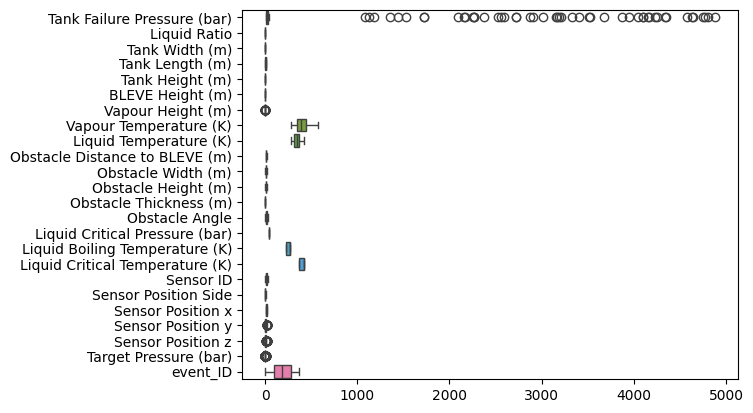

In [427]:
# 2: Handling Outliers
outlier_df = raw_train3.drop("ID", axis = 1).select_dtypes(exclude=['object']).copy()
sns.boxplot(outlier_df, orient = "h")
plt.show()

In [428]:
outlier_count = len(raw_train3.query("`Tank Failure Pressure (bar)` > 500"))
outlier_df.sort_values("Tank Failure Pressure (bar)", ascending = False, inplace = True)
display(outlier_df.iloc[outlier_count - 5 : outlier_count + 5])

,Tank Failure Pressure (bar),Liquid Ratio,Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Distance to BLEVE (m),...,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar),event_ID
162,1446.628788,0.28,2.81,4.59,1.40,0.39,1.00,352.10,339.21,13.0,...,42.5,231.0,369.7,18.0,2.0,14.35,3.50,6.9,1.085879,7
8691,1353.072065,0.28,0.58,5.79,0.82,0.81,0.58,338.90,314.47,14.0,...,42.5,231.0,369.7,6.0,1.0,15.55,0.80,1.7,0.046163,322
9781,1177.618895,0.82,0.82,8.61,1.19,0.22,0.40,492.91,402.44,6.0,...,37.9,272.0,425.0,10.0,2.0,6.35,0.10,-0.2,1.422706,362
5094,1122.531086,0.66,0.98,2.99,1.19,2.01,0.60,381.64,375.10,12.0,...,37.9,272.0,425.0,15.0,2.0,12.45,6.20,4.5,0.127876,189
2892,1080.803316,0.20,1.19,6.18,1.00,0.21,0.79,445.99,405.95,5.0,...,37.9,272.0,425.0,7.0,1.0,8.65,3.90,-0.4,0.053033,108
2626,42.290000,0.43,1.78,9.78,1.42,0.41,0.81,418.66,298.02,10.0,...,42.5,231.0,369.7,13.0,2.0,10.85,3.40,-0.6,1.886588,98
4316,42.290000,0.73,1.62,7.60,0.60,1.21,0.18,353.50,339.70,18.0,...,42.5,231.0,369.7,23.0,4.0,20.00,6.60,10.8,0.080978,160
2623,42.260000,0.43,1.78,9.81,1.42,0.38,0.79,418.19,297.95,10.0,...,42.5,231.0,369.7,11.0,2.0,10.85,1.60,2.2,1.965685,98
4298,42.240000,0.73,1.59,7.62,0.61,1.18,0.20,353.91,339.13,18.0,...,42.5,231.0,369.7,5.0,1.0,21.25,6.60,4.7,0.034123,160
2633,42.230000,0.43,1.80,9.80,1.38,0.40,0.80,419.17,298.10,10.0,...,42.5,231.0,369.7,20.0,3.0,12.30,1.35,2.2,0.925384,98


fix values

In [429]:
outlier_df.loc[outlier_df['Tank Failure Pressure (bar)'] > 1000, 'Tank Failure Pressure (bar)'] /= 100




## *Data encoding*
identifyiing liquid




In [430]:
#fix spelling mistakes
raw_train3["Status"].unique()


array(['Superheated', 'Superheat', 'Subcooled', 'subcooled',
       'Saperheated', 'Subcool', 'Subcoled', 'superheated'], dtype=object)

In [431]:
raw_train3.loc[raw_train3['Status'].str.contains('c', case=False), 'Status'] = 'Subcooled'
raw_train3.loc[raw_train3['Status'].str.contains('h', case=False), 'Status'] = 'Superheated'
raw_train3["Status"].unique()

array(['Superheated', 'Subcooled'], dtype=object)

## *Data correction*

- measurement errors

- unit errors

- spelliing
- 

'Vapour Temperature (K)',  'Liquid Temperature (K)' 'Status', 'Liquid Critical Pressure (bar)','Liquid Boiling Temperature (K)', 'Liquid Critical Temperature (K)' 

In [432]:
#correcting noise
def round_tank_measurements(df):
    """Round tank measurements to nearest 0.1
    
    Args:
        df (pandas.DataFrame): Input dataframe containing tank measurements
        
    Returns:
        pandas.DataFrame: Dataframe with rounded measurements
    """
    # Create a copy to avoid modifying the original dataframe
    df_rounded = df.copy()
    
    # Columns to round
    columns_to_round = [
        'Tank Width (m)',
        'Tank Length (m)',
        'Tank Height (m)',
        'BLEVE Height (m)'
    ]
    
    # Round each column to 1 decimal place (nearest 0.1)
    for column in columns_to_round:
        df_rounded[column] = df_rounded[column].round(1)
    
    return df_rounded

# Apply the rounding function to the training data
raw_train_rounded = round_tank_measurements(raw_train)


## *Feature addition*

sensor distance to BLEVE
Volume

volume of gas in tank
    - pv = nrt
    - ratio with tank volume

grouping explosion events


In [435]:
# Generate event_nums
event_ID = 1
prev_id = raw_train["Sensor ID"][0]
prev_trial = raw_train["ID"][0]



event_ID_list = []

for index, row in raw_train.iterrows():
    curr_id = row["Sensor ID"]
    curr_trial = row["ID"]
    # new event if sensor_id decreases (i.e. goes from 26, 27 --> 1, 2, ...) OR the ID value is more than 27 larger than the previous value
    if (curr_id < prev_id) or (curr_trial > prev_trial + 27):
        event_ID += 1 
       
    event_ID_list.append(event_ID)

    prev_id = curr_id
    prev_trial = curr_trial

raw_train.loc[:,"event_ID"] = event_ID_list
raw_train2 = fix_missing_values(raw_train)
raw_train2

,ID,Tank Failure Pressure (bar),Liquid Ratio,Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),...,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar),event_ID
0,3203.0,14.26,0.25,1.58,8.61,1.79,1.01,1.40,457.14,423.07,...,37.9,272.0,425.0,18.0,2.0,19.75,5.70,3.1,0.588298,1
1,3204.0,14.14,0.25,1.59,8.58,1.81,1.00,1.41,457.71,422.82,...,37.9,272.0,425.0,19.0,3.0,20.00,-5.15,-1.5,0.551524,1
2,3205.0,14.05,0.24,1.62,8.59,1.79,0.98,1.38,456.58,422.37,...,37.9,272.0,425.0,20.0,3.0,20.00,-5.15,0.8,0.550813,1
3,3206.0,14.17,0.24,1.59,8.60,1.80,0.98,1.40,456.81,423.28,...,37.9,272.0,425.0,21.0,3.0,20.00,-5.15,3.1,0.528906,1
4,3207.0,14.09,0.24,1.59,8.60,1.80,1.00,1.40,456.93,423.19,...,37.9,272.0,425.0,22.0,4.0,20.00,-4.90,3.4,0.454363,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10038,13199.0,27.08,0.22,1.82,3.81,0.60,0.01,0.60,335.57,412.15,...,37.9,272.0,425.0,24.0,4.0,8.20,4.50,9.8,0.266413,371
10039,13200.0,26.99,0.22,1.81,3.80,0.61,0.00,0.61,337.57,412.08,...,37.9,272.0,425.0,25.0,5.0,8.20,4.75,-0.1,0.267873,371
10040,13201.0,27.16,0.21,1.78,3.81,0.62,0.01,0.59,336.08,412.76,...,37.9,272.0,425.0,26.0,5.0,8.20,4.75,4.7,0.320323,371
10041,13201.0,27.16,0.21,1.78,3.81,0.62,0.01,0.59,336.08,412.76,...,37.9,272.0,425.0,26.0,5.0,8.20,4.75,4.7,0.320323,371


### *tank volume*

## **

## *data processing function*


In [434]:
def process_data(df):
    #import data
    #rename columns
    #sort by ID
    #remove duplicates
    #generate event ID
    #handle missing values
    
    #convert to K
    # convert to bar
    #encode catagorical variables
    #feature addition   
    #feature engineering 
    #feature scaling
    #data augmentation
    
    
   
    
    

_IncompleteInputError: incomplete input (985168638.py, line 20)

## **ML Models**